<a href="https://colab.research.google.com/github/noegaill/2025_Intro_Python/blob/main/notebook/W3_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Hurricane Track Analysis

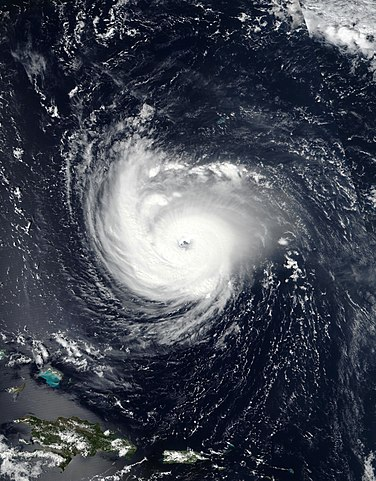

*Can you quickly find out which US states hurricane Florence passed through using `GeoPandas`?*

Image source: [NASA Worldview](https://worldview.earthdata.nasa.gov/)

```{tip} Installing GeoPandas

Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook
```

In [12]:
#Install GeoPandas' dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

In [ ]:
#Install GeoPandas
!pip install --upgrade geopandas

In [16]:
import pooch
# Download the data used in this notebook
data = pooch.retrieve('https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew?download=1',
                          known_hash='200a740d0e448aa9e4e03d8a9965a70f228442a2da28d804c8e2337d0ef9749e',
                          processor=pooch.Unzip()
                          )
data

['/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/gz_2010_us_040_00_5m.json',
 '/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/florence.csv',
 '/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/__MACOSX/._gz_2010_us_040_00_5m.json',
 '/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/__MACOSX/._florence.csv']





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Exercise's Instructions**

* Apply GeoPandas to read in the geospatial data, plot, and analyse the track of Hurricane Florence from August 30th to September 18th 2018.
* Either write your own code, or fill in the blanks in the hidden cells 🙂

## Q1) import geopandas, pandas

In [14]:
#Import GeoPandas (as gpd), pandas, and matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



In [15]:
# And ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
#Import GeoPandas (as gpd), pandas, and matplotlib
import ____ as gpd
import ____ as pd
import matplotlib.pyplot as plt

## Q2) Read a Shapefile with GeoPandas's read_file function

In [20]:
# Read data with the geopandas function
# The path to the file should be /content/data/hurricane-data/gz_2010_us_040_00_5m.json
path = data[0]
country = gpd.read_file(path)



In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Read data with the geopandas function
path = data[0]
country = gpd.____(path)

## Q3) Have a look at the data, what type of geometries does the data contain?

In [24]:
# Print out the first few lines of the data
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# The method to see the first few lines of the data
country.____()

## Q4) Have a look at the data on a map using GeoPandas's .plot() method. Exclude Alaska and Hawaii by the attribute 'NAME' and Pandas's .isin() method. Specify the figsize to be 30 x 20.

Text(0.5, 1.0, 'US states')

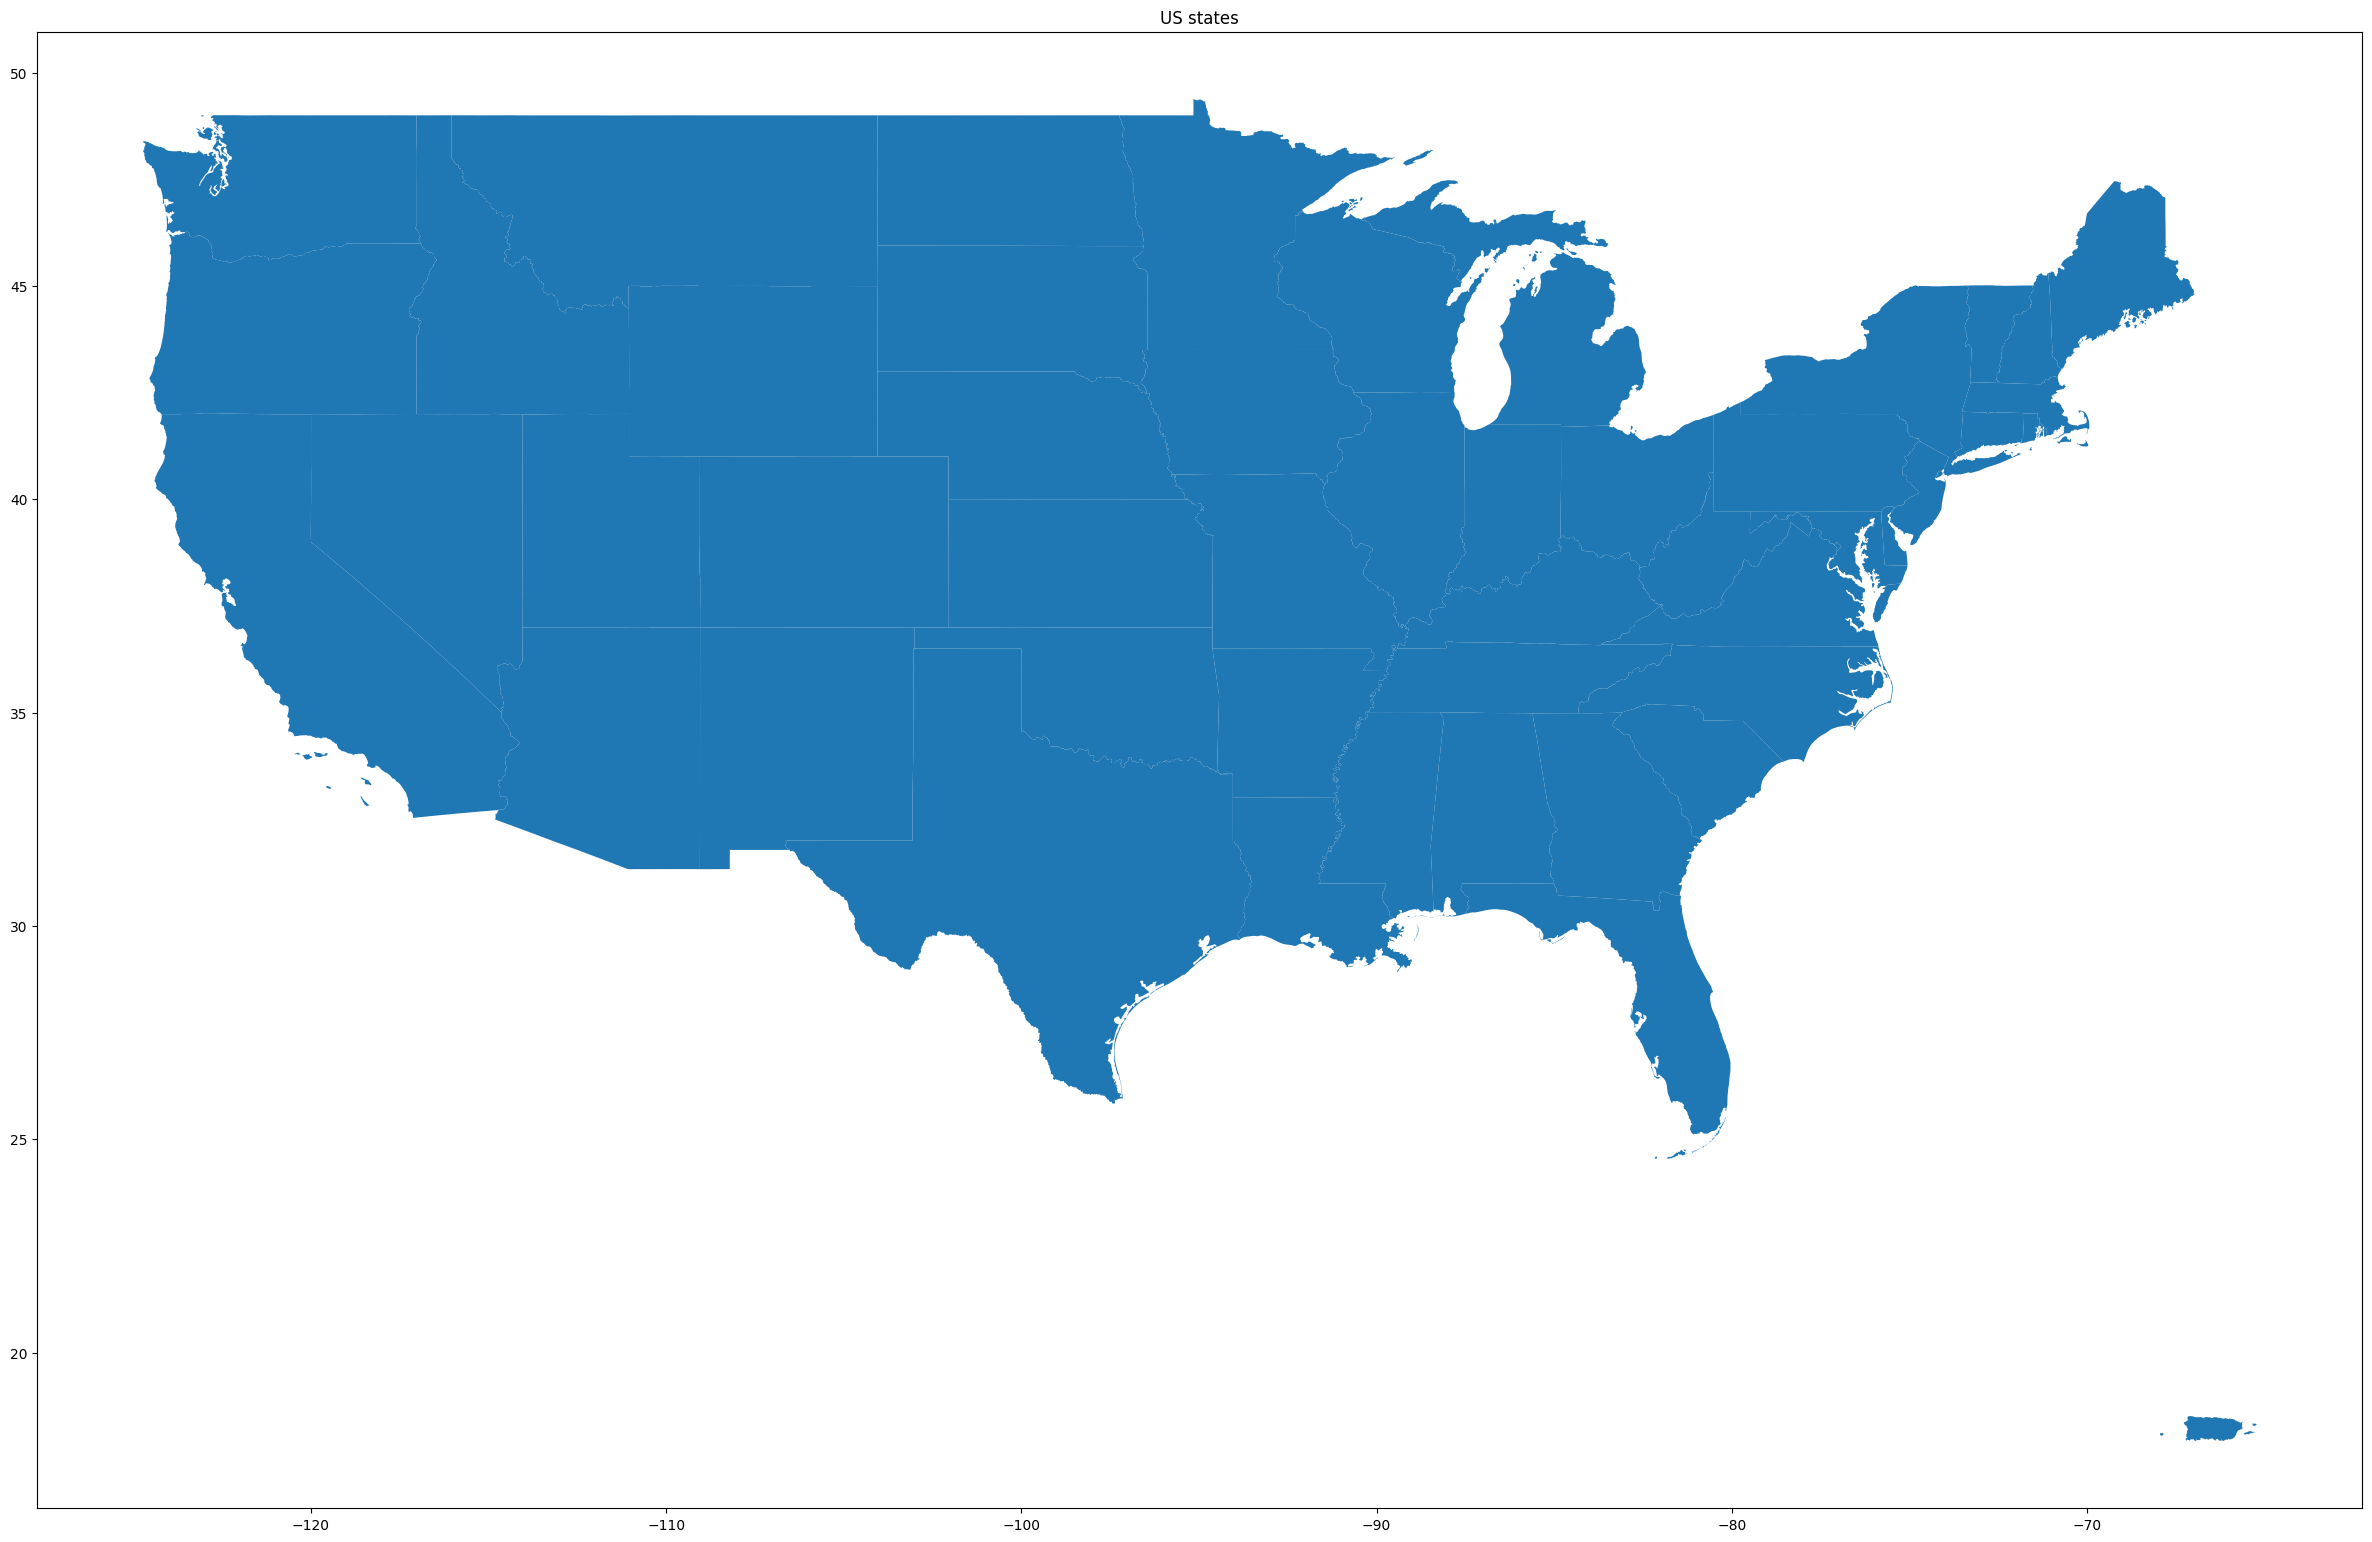

In [44]:
# Plot the US states (Alaska and Hawaii excluded)

fig, ax = plt.subplots(1,1, figsize=(30,20))

country2 = country[country['NAME'].isin(['Alaska','Hawaii']) == False]

country2.plot(ax = ax)

ax.set_title('US states')









In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plot the US states (Alaska and Hawaii excluded)
country[country[____].isin([Alaska,Hawaii]) == False].plot(figsize=(30,20))

<Axes: >

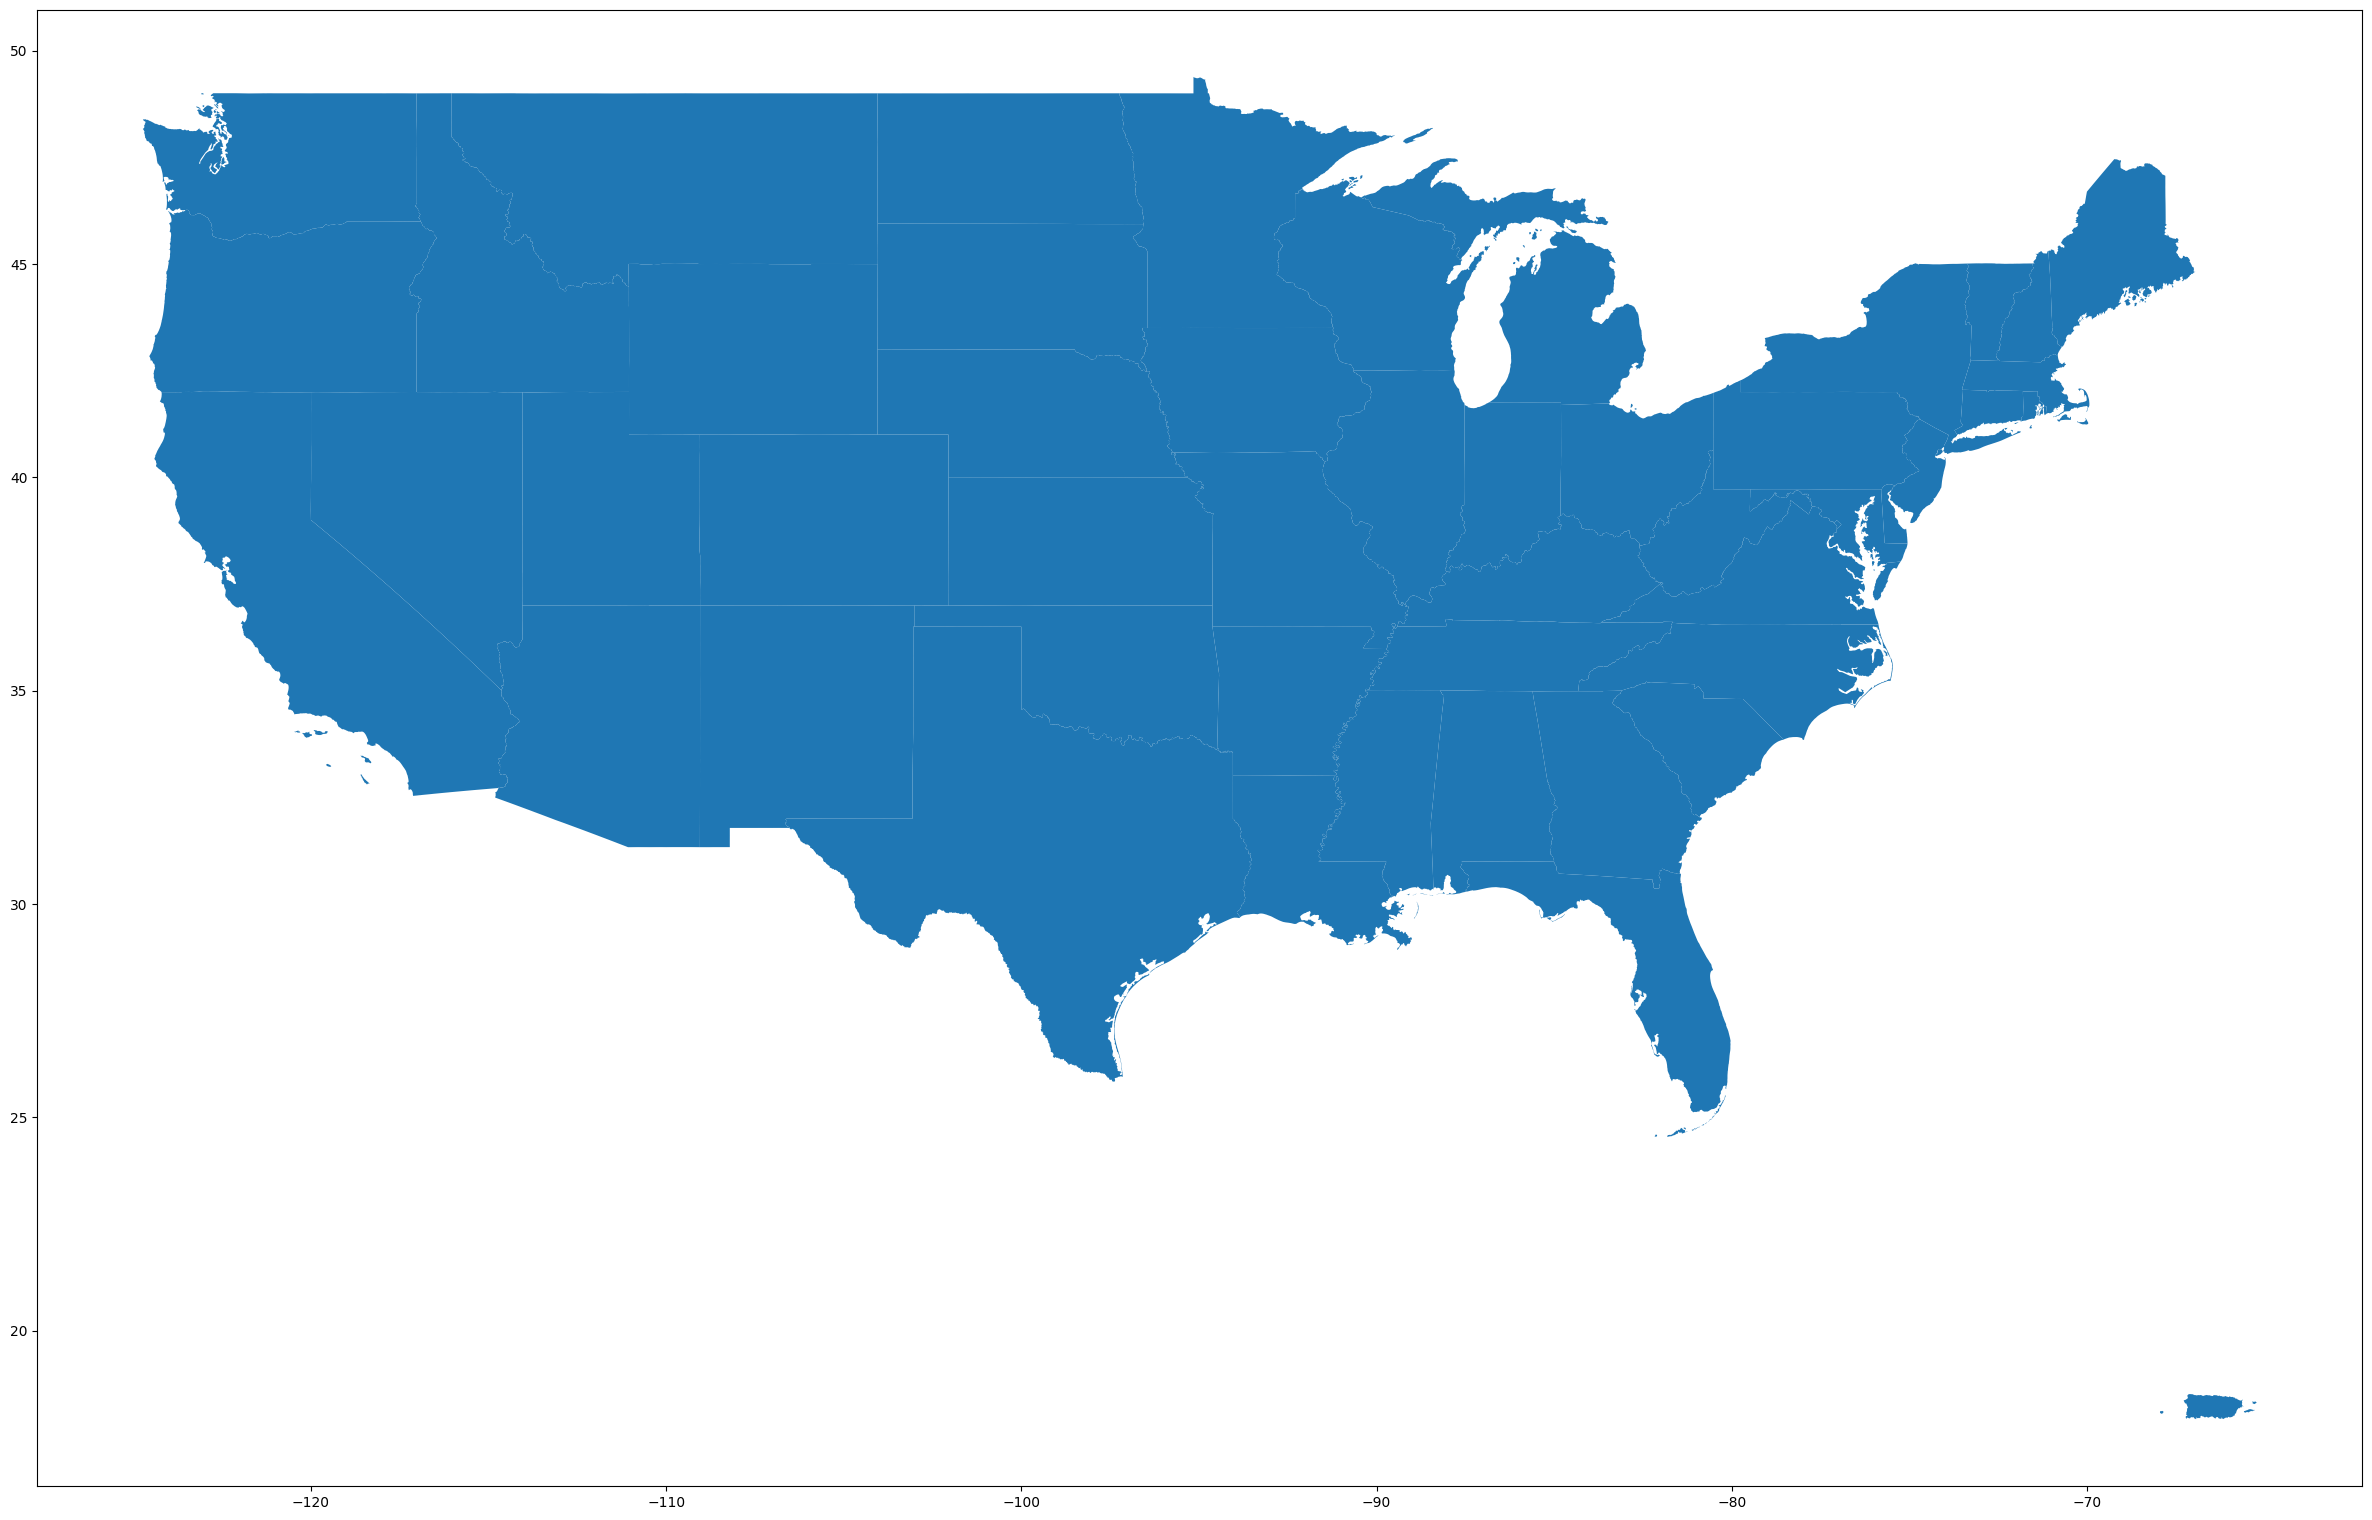

In [39]:
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20))

In [ ]:
# Read in the hurricane florence data, change the longitude, and have a look at the hurricane florence dataframe
tc_path = data[1]
florence = pd.read_csv(tc_path)
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence['Long'] = 0 - florence['Long']
florence.head(3)

## Q5) Create a GeoDataFrame from florence DataFrame

In [ ]:
# Create a geodataframe from the hurricane florence dataframe

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Create a geodataframe from the hurricane florence dataframe
gdf_florence = gpd.____(florence, geometry=gpd.____(florence.Long, florence.Lat))

In [ ]:
# Have a look at the hurricane geodataframe
gdf_florence.head(2)

## Q6) Plot the US states map (without Alaska, Hawaii) and hurricane florence together

In [ ]:
# Plot to see the hurricane overlay over the US map

# And plot the hurricane position on top with red color to stand out:

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country[____].isin([____,____]) == False].____(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
gdf_florence.____(ax=base, color='darkred', marker="*", markersize=10)

## Q7) What's the coordinate reference system of the data?

In [ ]:
# Check the coordinate reference system of the geodataframe

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Check the coordinate reference system of the geodataframe
country.____

## Q8) Which states are passed by the hurricane?

```{hint}
One approach may be plot and see the trajectory of the hurricane on the US map. Other approaches are more than welcome.
```

In [ ]:
# Plot the US states without Alaska and Hawaii, then
#  Annotate the US states with their names, then
# Select the hurricane trajectory points inside the US boundary with the overlay operation, then
# Plot the hurricane trajectory inside US boundary

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plot the US states without Alaska and Hawaii
df = country[country[____].isin([____,____]) == False]
ax = df.plot(figsize=(30,20))
#  Annotate the US states with their names
_ = df.apply(lambda x: ax.____(s=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Select the hurricane trajectory points inside the US boundary with the overlay operation
res_intersection = gdf_florence.____(country, how='intersection')
# Plot the hurricane trajectory inside US boundary
____.plot(ax=ax, color='red', marker="*", markersize=25)